In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='str'))

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [13]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

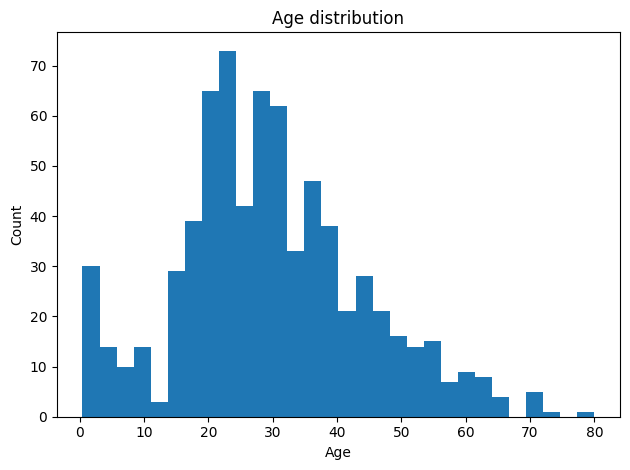

In [23]:
ax = df["Age"].dropna().plot(kind="hist", bins=30)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/figures/age_distribution.png", dpi=200)
plt.show()

In [16]:
survival_by_sex = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
survival_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

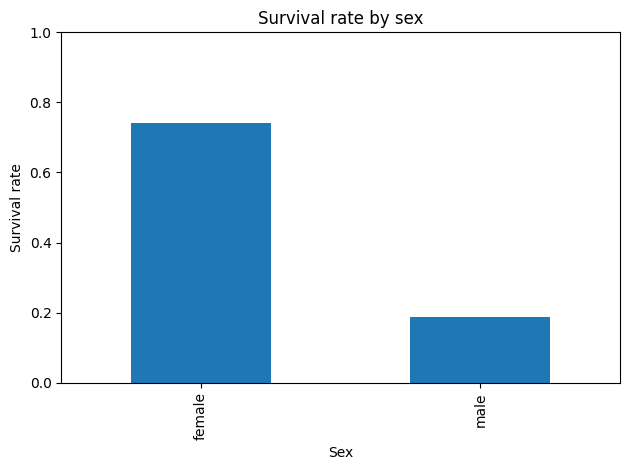

In [24]:
ax = survival_by_sex.plot(kind="bar")
plt.title("Survival rate by sex")
plt.xlabel("Sex")
plt.ylabel("Survival rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("../reports/figures/survival_by_sex.png", dpi=200)
plt.show()

In [18]:
survival_by_class = df.groupby("Pclass")["Survived"].mean().sort_index()
survival_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

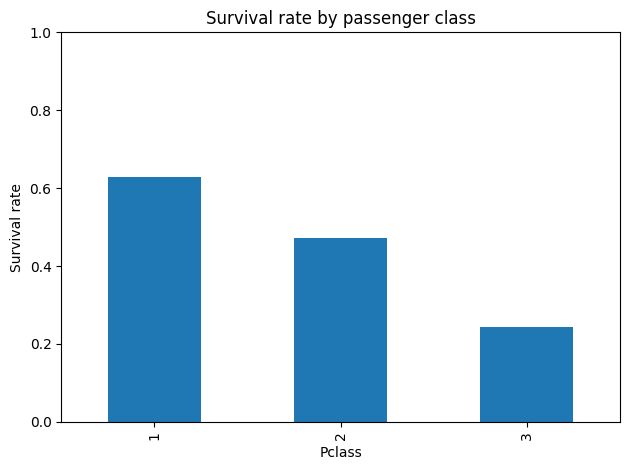

In [25]:
ax = survival_by_class.plot(kind="bar")
plt.title("Survival rate by passenger class")
plt.xlabel("Pclass")
plt.ylabel("Survival rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("../reports/figures/survival_by_class.png", dpi=200)
plt.show()

## Wnioski (Titanic — EDA)

- **Przeżywalność mocno zależy od płci**: kobiety mają wyraźnie wyższy odsetek przeżyć niż mężczyźni.
- **Klasa pasażera ma duże znaczenie**: najwyższa przeżywalność jest w **1. klasie**, niższa w **2.**, a najniższa w **3. klasie**.
- W kolumnie **Age** występują braki danych, więc przed dalszą analizą/modelowaniem trzeba je uzupełnić lub zastosować inną strategię (np. medianą / grupami).
- Kolumna **Cabin** ma bardzo dużo braków, przez co w tej postaci jest mało użyteczna (wymagałaby mocnych założeń albo inżynierii cech).
- Zmienna **Fare** ma rozkład prawoskośny (dużo niskich wartości i kilka bardzo wysokich), dlatego lepiej interpretować medianę/percentyle niż samą średnią.

In [26]:
df_clean = df.copy()

df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())

df_clean["Embarked"] = df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0])

df_clean = df_clean.drop(columns=["Cabin"])

df_clean.to_csv("../data/processed/titanic_clean.csv", index=False)

df_clean.isna().sum().sort_values(ascending=False).head(10)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64